In [188]:
import os
os.chdir(r'D:\Uddhav\DATA SCIENCE\EDA Projets\Insurance Data')

import pandas as pd
pd.set_option('display.max_column',None)

import warnings
warnings.filterwarnings('ignore')

import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2, chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd


from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_predict, train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [100]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [101]:
df = pd.read_csv('insurance1.csv')
df

,id,age,sex,bmi,children,smoker,region,charges
0,1001,19,female,27.900,0,yes,southwest,16884.924000
1,1002,18,male,33.770,1,no,southeast,1725.552300
2,1003,28,male,33.000,3,no,southeast,4449.462000
3,1004,33,male,22.705,0,no,northwest,21984.470610
4,1005,32,male,28.880,0,no,northwest,3866.855200
5,1006,31,female,25.740,0,no,southeast,3756.621600
6,1007,46,female,33.440,1,no,southeast,8240.589600
7,1008,37,female,27.740,3,no,northwest,7281.505600
8,1009,37,male,29.830,2,no,northeast,6406.410700
9,1010,60,female,25.840,0,no,northwest,28923.136920


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [103]:
df.describe()

,id,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,1669.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,1001.000000,18.000000,15.960000,0.000000,1121.873900
25%,1335.250000,27.000000,26.296250,0.000000,4740.287150
50%,1669.500000,39.000000,30.400000,1.000000,9382.033000
75%,2003.750000,51.000000,34.693750,2.000000,16639.912515
max,2338.000000,64.000000,53.130000,5.000000,63770.428010


In [104]:
df.isnull().sum()

id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

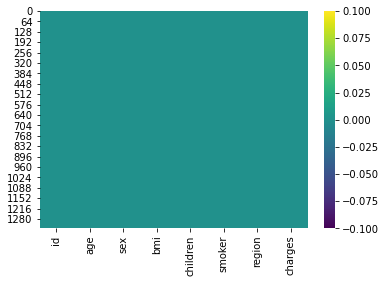

In [105]:
sns.heatmap(df.isnull(), cmap = 'viridis')

# EDA

## Target Variable : Charges

In [106]:
df.charges.value_counts()

1639.563100     2
11987.168200    1
7624.630000     1
12523.604800    1
10355.641000    1
22395.744240    1
20709.020340    1
1627.282450     1
6666.243000     1
16657.717450    1
1824.285400     1
12890.057650    1
22462.043750    1
12129.614150    1
5630.457850     1
13041.921000    1
9617.662450     1
14313.846300    1
8068.185000     1
6555.070350     1
28476.734990    1
11944.594350    1
10422.916650    1
3558.620250     1
11093.622900    1
12233.828000    1
8027.968000     1
1682.597000     1
13217.094500    1
21771.342300    1
7742.109800     1
6289.754900     1
12979.358000    1
3471.409600     1
5472.449000     1
1967.022700     1
8823.279000     1
10381.478700    1
2302.300000     1
11272.331390    1
8968.330000     1
39725.518050    1
13204.285650    1
9101.798000     1
21880.820000    1
23807.240600    1
2254.796700     1
12044.342000    1
11363.283200    1
7201.700850     1
4719.736550     1
11454.021500    1
12950.071200    1
4931.647000     1
39556.494500    1
34828.6540

In [107]:
df.charges.isnull().sum()

0

In [108]:
df.charges.describe()

count    1338.000000 
mean     13270.422265
std      12110.011237
min      1121.873900 
25%      4740.287150 
50%      9382.033000 
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

<AxesSubplot:xlabel='charges', ylabel='Density'>

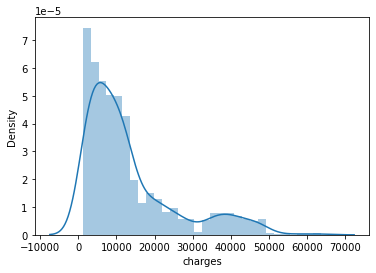

In [109]:
sns.distplot(df.charges)

<AxesSubplot:xlabel='charges'>

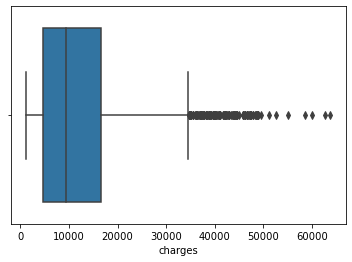

In [110]:
sns.boxplot(df.charges)

#### Treating Outliers

In [111]:
Q3_t = df.charges.quantile(0.75)
Q1_t = df.charges.quantile(0.25)
IQR_t = Q3_t - Q1_t

UL_t = Q3_t + (1.5*IQR_t)
LL_t = Q1_t - (1.5*IQR_t)
print(UL_t)

34489.350562499996


In [112]:
df.charges[(df.charges > UL_t)].value_counts().sum()

139

In [113]:
df.charges[(df.charges < LL_t)].value_counts().sum()

0

In [114]:
df[df.charges > UL_t] 

,id,age,sex,bmi,children,smoker,region,charges
14,1015,27,male,42.130,0,yes,southeast,39611.75770
19,1020,30,male,35.300,0,yes,southwest,36837.46700
23,1024,34,female,31.920,1,yes,northeast,37701.87680
29,1030,31,male,36.300,2,yes,southwest,38711.00000
30,1031,22,male,35.600,0,yes,southwest,35585.57600
34,1035,28,male,36.400,1,yes,southwest,51194.55914
38,1039,35,male,36.670,1,yes,northeast,39774.27630
39,1040,60,male,39.900,0,yes,southwest,48173.36100
49,1050,36,male,35.200,1,yes,southeast,38709.17600
53,1054,36,male,34.430,0,yes,southeast,37742.57570


In [115]:
df.charges =np.where(df.charges > UL_t , UL_t ,df.charges)

<AxesSubplot:xlabel='charges'>

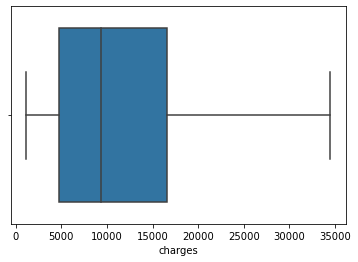

In [116]:
sns.boxplot(df.charges)

<AxesSubplot:xlabel='charges', ylabel='Density'>

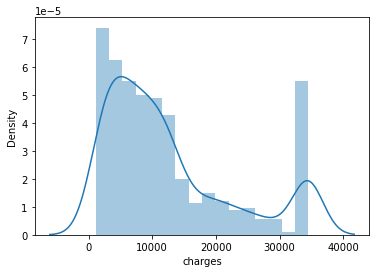

In [117]:
sns.distplot(df.charges)

## Age

In [118]:
df.age.value_counts()

18    69
19    68
20    29
51    29
45    29
46    29
47    29
48    29
50    29
52    29
28    28
54    28
21    28
27    28
26    28
49    28
25    28
24    28
23    28
22    28
53    28
42    27
44    27
43    27
41    27
40    27
31    27
30    27
29    27
56    26
34    26
33    26
32    26
57    26
55    26
35    25
59    25
58    25
36    25
39    25
38    25
37    25
60    23
61    23
62    23
63    23
64    22
Name: age, dtype: int64

In [119]:
df.age.isnull().sum()

0

<AxesSubplot:xlabel='age', ylabel='count'>

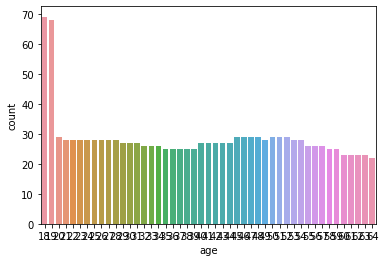

In [120]:
sns.countplot(df.age)

<AxesSubplot:xlabel='age'>

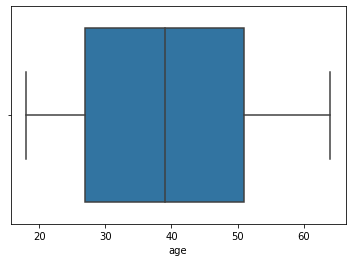

In [121]:
sns.boxplot(df.age)

<AxesSubplot:xlabel='age', ylabel='Density'>

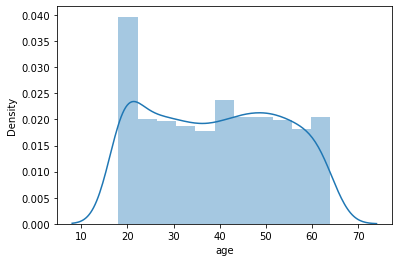

In [122]:
sns.distplot(df.age)

<AxesSubplot:xlabel='age', ylabel='charges'>

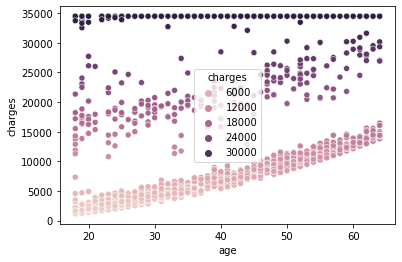

In [123]:
sns.scatterplot(x = 'age', y = 'charges', data = df, hue = 'charges')

In [193]:
co_rel = df.age.corr(df.charges)
co_rel

0.3133940669095313

## Sex

In [124]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [125]:
df.sex.isnull().sum()

0

<AxesSubplot:xlabel='sex', ylabel='count'>

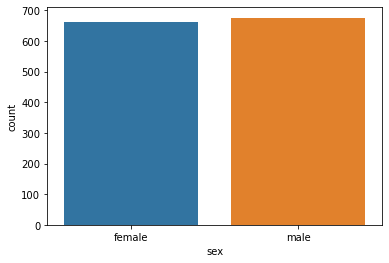

In [126]:
sns.countplot(df.sex)

<AxesSubplot:xlabel='sex'>

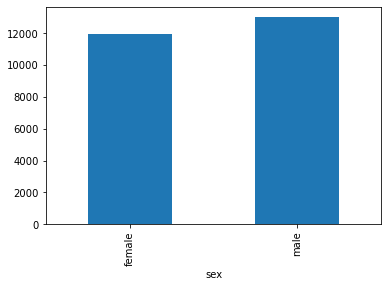

In [127]:
df.groupby('sex')['charges'].mean().plot(kind = 'bar')

In [161]:
df['sex'] = df.get('sex').replace('male',1)
df['sex'] = df.get('sex').replace('female',2)

In [194]:
mod = ols('charges ~ age', data=df).fit()
aov_table = sm.stats.anova_lm(mod)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
age,1.0,1.354984e+10,1.354984e+10,145.507506,7.054595e-32
Residual,1336.0,1.244100e+11,9.312124e+07,NaN,NaN


## BMI

In [128]:
df.bmi.value_counts()

32.300    13
28.310    9 
30.800    8 
34.100    8 
28.880    8 
30.875    8 
31.350    8 
30.495    8 
35.200    7 
30.590    7 
33.330    7 
24.320    7 
25.460    7 
34.800    7 
27.645    7 
27.360    7 
38.060    7 
25.800    7 
32.110    7 
32.775    7 
27.500    6 
27.740    6 
37.100    6 
35.530    6 
30.115    6 
29.920    6 
33.630    6 
31.730    6 
19.950    6 
30.200    6 
29.830    6 
26.600    6 
26.410    6 
28.595    6 
33.000    6 
25.175    6 
23.210    5 
33.155    5 
28.025    5 
22.515    5 
28.975    5 
29.640    5 
25.080    5 
27.600    5 
26.315    5 
33.660    5 
30.400    5 
31.920    5 
30.780    5 
28.700    5 
23.655    5 
31.825    5 
28.785    5 
23.180    5 
36.850    5 
33.345    5 
25.840    5 
28.900    5 
34.200    5 
26.695    5 
32.395    5 
25.300    5 
28.500    5 
29.700    5 
26.030    5 
27.835    5 
35.970    4 
22.895    4 
35.300    4 
29.810    4 
27.830    4 
29.600    4 
31.130    4 
21.755    4 
33.915    4 
25.740    4 
24.700    4 

In [129]:
df.bmi.isnull().sum()

0

(array([ 30., 127., 234., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <BarContainer object of 10 artists>)

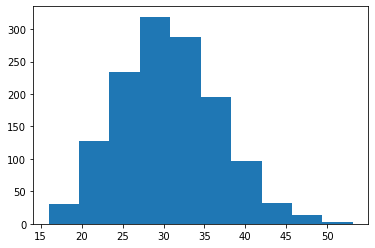

In [130]:
plt.hist(df.bmi)

<AxesSubplot:xlabel='bmi'>

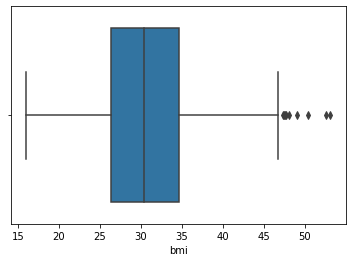

In [131]:
sns.boxplot(df.bmi)

In [132]:
Q3_b = df.bmi.quantile(0.75)
Q1_b = df.bmi.quantile(0.25)
IQR_b = Q3_b - Q1_b

UL_b = Q3_b + (1.5*IQR_b)
LL_b = Q1_b - (1.5*IQR_b)
print(UL_b)

47.290000000000006


In [133]:
df.bmi[(df.bmi > UL_b)].value_counts().sum()

9

In [134]:
df.bmi[(df.bmi < LL_b)].value_counts().sum()

0

In [135]:
df[df.bmi > UL_b] 

,id,age,sex,bmi,children,smoker,region,charges
116,1117,58,male,49.06,0,no,southeast,11381.325400
286,1287,46,female,48.07,2,no,northeast,9432.925300
401,1402,47,male,47.52,1,no,southeast,8083.919800
543,1544,54,female,47.41,0,yes,southeast,34489.350562
847,1848,23,male,50.38,1,no,southeast,2438.055200
860,1861,37,female,47.60,2,yes,southwest,34489.350562
1047,2048,22,male,52.58,1,yes,southeast,34489.350562
1088,2089,52,male,47.74,1,no,southeast,9748.910600
1317,2318,18,male,53.13,0,no,southeast,1163.462700


In [136]:
df.bmi =np.where(df.bmi > UL_b , UL_b ,df.charges)

<AxesSubplot:xlabel='bmi'>

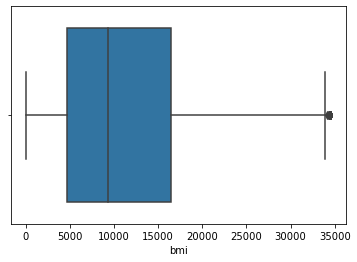

In [137]:
sns.boxplot(df.bmi)

<AxesSubplot:xlabel='bmi', ylabel='Density'>

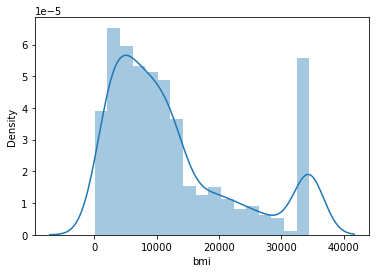

In [138]:
sns.distplot(df.bmi)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

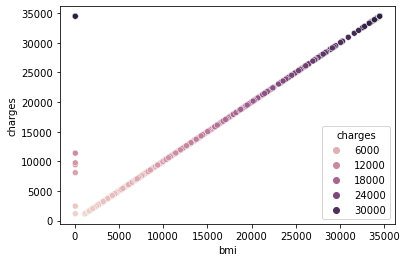

In [139]:
sns.scatterplot(x = 'bmi', y = 'charges', data = df, hue = 'charges')

In [195]:
co_rel = df.bmi.corr(df.charges)
co_rel

0.9857570794605574

## Children

In [140]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4    25 
5    18 
Name: children, dtype: int64

In [141]:
df.children.isnull().sum()

0

<AxesSubplot:xlabel='children', ylabel='count'>

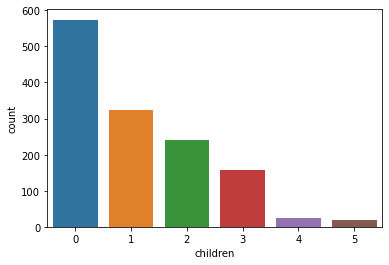

In [142]:
sns.countplot(df.children)

<AxesSubplot:xlabel='children'>

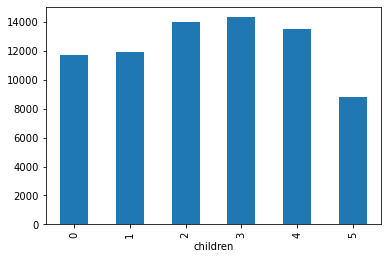

In [143]:
df.groupby('children')['charges'].mean().plot(kind = 'bar')

In [196]:
co_rel = df.children.corr(df.charges)
co_rel

0.07307387030482494

## Smoker

In [144]:
df.smoker.value_counts()

no     1064
yes    274 
Name: smoker, dtype: int64

In [145]:
df.smoker.isnull().sum()

0

<AxesSubplot:xlabel='smoker', ylabel='count'>

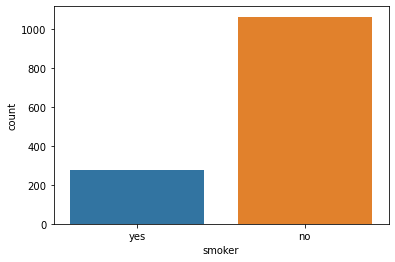

In [146]:
sns.countplot(df.smoker)

<AxesSubplot:xlabel='smoker'>

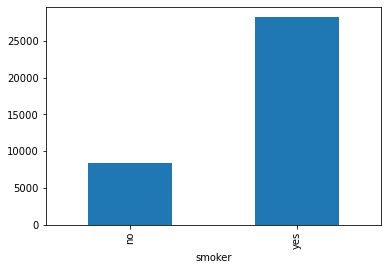

In [147]:
df.groupby('smoker')['charges'].mean().plot(kind = 'bar')

In [169]:
df['smoker'] = df.get('smoker').replace('yes',1)
df['smoker'] = df.get('smoker').replace('no',0)

In [197]:
mod = ols('smoker ~ age', data=df).fit()
aov_table = sm.stats.anova_lm(mod)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
age,1.0,0.136385,0.136385,0.836777,0.360485
Residual,1336.0,217.753002,0.162989,NaN,NaN


## Region

In [148]:
df.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [149]:
df.region.isnull().sum()

0

<AxesSubplot:xlabel='region', ylabel='count'>

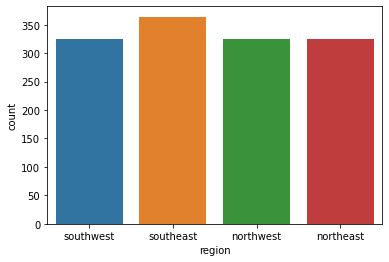

In [150]:
sns.countplot(df.region)

<AxesSubplot:xlabel='region'>

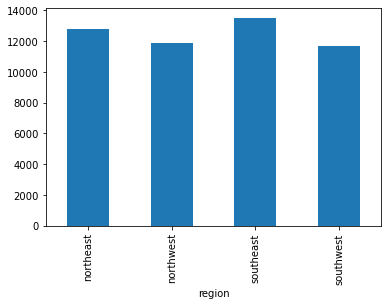

In [151]:
df.groupby('region')['charges'].mean().plot(kind = 'bar')

In [170]:
df['region'] = df.get('region').replace('southeast',1)
df['region'] = df.get('region').replace('southwest',2)
df['region'] = df.get('region').replace('northeast',3)
df['region'] = df.get('region').replace('northwest',4)

In [198]:
mod = ols('region ~ age', data=df).fit()
aov_table = sm.stats.anova_lm(mod)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
age,1.0,0.046444,0.046444,0.036289,0.848949
Residual,1336.0,1709.851912,1.279829,NaN,NaN


In [200]:
df.drop(['children'], axis = 1, inplace=True)

age        0.313394
sex       -0.052322
bmi        0.985757
smoker     0.785958
region    -0.043793
charges    1.000000
Name: charges, dtype: float64

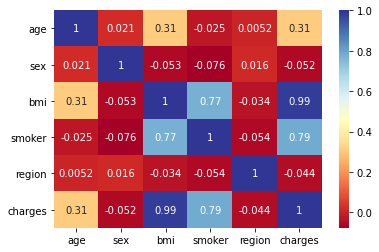

In [201]:
sns.heatmap(df.corr(),annot = True, cmap='RdYlBu')
df.corr()['charges']

# Model Building

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      1338 non-null   int64  
 1   sex      1338 non-null   int64  
 2   bmi      1338 non-null   float64
 3   smoker   1338 non-null   int64  
 4   region   1338 non-null   int64  
 5   charges  1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [205]:
x = df.iloc[:,:5]

In [206]:
x

,age,sex,bmi,smoker,region
0,19,2,16884.924000,1,2
1,18,1,1725.552300,0,1
2,28,1,4449.462000,0,1
3,33,1,21984.470610,0,4
4,32,1,3866.855200,0,4
5,31,2,3756.621600,0,1
6,46,2,8240.589600,0,1
7,37,2,7281.505600,0,4
8,37,1,6406.410700,0,3
9,60,2,28923.136920,0,4


In [207]:
y = df.charges

In [208]:
y

0       16884.924000
1       1725.552300 
2       4449.462000 
3       21984.470610
4       3866.855200 
5       3756.621600 
6       8240.589600 
7       7281.505600 
8       6406.410700 
9       28923.136920
10      2721.320800 
11      27808.725100
12      1826.843000 
13      11090.717800
14      34489.350562
15      1837.237000 
16      10797.336200
17      2395.171550 
18      10602.385000
19      34489.350562
20      13228.846950
21      4149.736000 
22      1137.011000 
23      34489.350562
24      6203.901750 
25      14001.133800
26      14451.835150
27      12268.632250
28      2775.192150 
29      34489.350562
30      34489.350562
31      2198.189850 
32      4687.797000 
33      13770.097900
34      34489.350562
35      1625.433750 
36      15612.193350
37      2302.300000 
38      34489.350562
39      34489.350562
40      3046.062000 
41      4949.758700 
42      6272.477200 
43      6313.759000 
44      6079.671500 
45      20630.283510
46      3393.356350 
47      3556.

In [209]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.20, random_state=0)

In [210]:
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

In [211]:
xtrain.shape

(1070, 5)

In [212]:
xtest.shape

(268, 5)

In [213]:
ytrain.shape

(1070,)

In [214]:
ytest.shape

(268,)

In [215]:
sgdr = SGDRegressor()
sgdr.fit(xtrain,ytrain)

score = sgdr.score(xtrain, ytrain)
print('R-Square: ', score)

R-Square:  0.9675035125811098


In [216]:
y_pred = sgdr.predict(xtest)

In [217]:
mse = mean_squared_error(ytest, y_pred)
print('MSE: ', mse)
print('RMSE: ', np.sqrt(mse))

MSE:  288115.14372748986
RMSE:  536.7635827135535
